# 2006 to 2019 Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns
import numpy as np
import geopandas as gpd

import warnings
warnings.simplefilter('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm
import plotly.express as px


## Questions explored in this analysis notebook
- Question 1: highest and lowest happiness ratings recently (2019)?
- Question 2: how have happiness ratings changed since 2006 regionally?
- Question 3: correlation between GDP (income inequality) and happiness?
- Question 4: correlation between social support and happiness?
- Question 5: correlation between health (life expectancy) and happiness?
- Question 6: correlation between faith in gvt vs happiness?
- Question 7: correlation between affect vs. happiness?
- Multiple Regression Analysis

#### Load cleaned dataset

In [2]:
hap_comp_df=pd.read_csv('../data/cleaned_data/06_19_hap_cleaned.csv')

In [3]:
hap_comp_df

Unnamed: 0 iso_alpha      country  year  happiness_rating  \
0              0       AFG  Afghanistan  2008          3.723590   
1              1       AFG  Afghanistan  2009          4.401778   
2              2       AFG  Afghanistan  2010          4.758381   
3              3       AFG  Afghanistan  2011          3.831719   
4              4       AFG  Afghanistan  2012          3.782938   
...          ...       ...          ...   ...               ...   
1816        1816       ZWE     Zimbabwe  2015          3.703191   
1817        1817       ZWE     Zimbabwe  2016          3.735400   
1818        1818       ZWE     Zimbabwe  2017          3.638300   
1819        1819       ZWE     Zimbabwe  2018          3.616480   
1820        1820       ZWE     Zimbabwe  2019          2.693523   

      GDP_per_capita  social_support_rating  life_expectancy  \
0           7.144916               0.450662        50.799999   
1           7.314788               0.552308        51.200001   
2           7.421525               0.539075        51.599998   
3           7.394349               0.521104        51.919998   
4           7.480296               0.520637        52.240002   
...              ...                    ...              ...   
1816        7.827643               0.735800        53.799999   
1817        7.819675               0.768425        54.400002   
1818        7.851042               0.754147        55.000000   
1819        7.896704               0.775388        55.599998   
1820        7.850442               0.759162        56.200001   

      Freedom to make life choices  Generosity  ...  \
0                         0.718114    0.178993  ...   
1                         0.678896    0.201228  ...   
2                         0.600127    0.131578  ...   
3                         0.495901    0.173452  ...   
4                         0.530935    0.246943  ...   
...                            ...         ...  ...   
1816                      0.667193   -0.117035  ...   
1817                      0.732971   -0.088488  ...   
1818                      0.752826   -0.091540  ...   
1819                      0.762675   -0.063282  ...   
1820                      0.631908   -0.062325  ...   

      GINI index (World Bank estimate)  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   
...                                ...   
1816                               NaN   
1817                               NaN   
1818                               NaN   
1819                               NaN   
1820                               NaN   

      GINI index (World Bank estimate), average 2000-2017, unbalanced panel  \
0                                                   NaN                       
1                                                   NaN                       
2                                                   NaN                       
3                                                   NaN                       
4                                                   NaN                       
...                                                 ...                       
1816                                              0.432                       
1817                                              0.432                       
1818                                              0.432                       
1819                                              0.432                       
1820                                              0.432                       

      income_inequality  Most people can be trusted, Gallup  trust_81_to_84  \
0                   NaN                                 NaN             NaN   
1              0.441906                            0.286315             NaN   
2              0.327318                            0.275833             NaN   
3

In [4]:
hap_comp_df.columns

Index(['Unnamed: 0', 'iso_alpha', 'country', 'year', 'happiness_rating',
       'GDP_per_capita', 'social_support_rating', 'life_expectancy',
       'Freedom to make life choices', 'Generosity', 'corruption_perceptions',
       'positive_affect', 'negative_affect', 'confidence_gvt',
       'democratic_quality', 'delivery_quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-2017, unbalanced panel',
       'income_inequality', 'Most people can be trusted, Gallup',
       'trust_81_to_84', 'trust_89_to_93', 'trust_94_to_98', 'trust_99_to_04',
       'trust_05_to_09', 'trust_10_to_14'],
      dtype='object')

## Question 1: Highest and lowest happiness ratings recently?

Most recent complete data I could find was 2019 from the World Happiness Report. I will explore happiness ratings from different countries in 2019. Is there potentially a pattern?

In [5]:
# Create row filter for year 2019
row_filter_2019 = hap_comp_df['year']==2019
rf19_df = hap_comp_df[row_filter_2019]

In [6]:
# Eyeball the dataset
rf19_df.shape

(138, 28)

In [7]:
# Get some information on the dataset and range
rf19_df['happiness_rating'].describe()

count    138.000000
mean       5.551438
std        1.112188
min        2.375092
25%        4.918828
50%        5.594325
75%        6.266353
max        7.780348
Name: happiness_rating, dtype: float64

<AxesSubplot:>

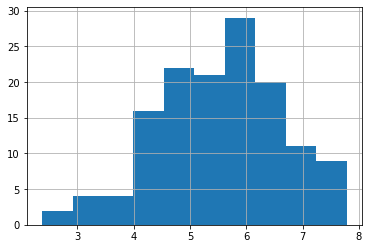

In [8]:
# Histogram to look at distribution
rf19_df['happiness_rating'].hist()

<AxesSubplot:xlabel='happiness_rating'>

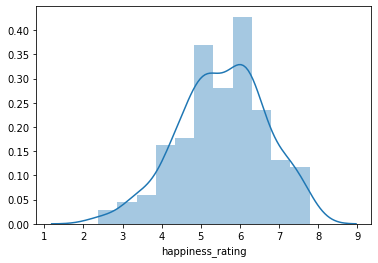

In [9]:
sns.distplot(rf19_df['happiness_rating'])

In [10]:
# Rank table of happiness ratings in 2019 by country, first by individual country
rf19_df.sort_values('happiness_rating', ascending=False)

Unnamed: 0 iso_alpha      country  year  happiness_rating  \
525          525       FIN      Finland  2019          7.780348   
1551        1551       CHE  Switzerland  2019          7.694221   
433          433       DNK      Denmark  2019          7.693003   
681          681       ISL      Iceland  2019          7.532505   
1220        1220       NOR       Norway  2019          7.442140   
...          ...       ...          ...   ...               ...   
1806        1806       ZMB       Zambia  2019          3.306797   
1368        1368       RWA       Rwanda  2019          3.268152   
695          695       IND        India  2019          3.248770   
1820        1820       ZWE     Zimbabwe  2019          2.693523   
11            11       AFG  Afghanistan  2019          2.375092   

      GDP_per_capita  social_support_rating  life_expectancy  \
525        10.651700               0.937416        72.000000   
1551       10.985887               0.948513        74.400002   
433        10.785298               0.957706        72.699997   
681        10.769532               0.981825        73.000000   
1220       11.092772               0.941784        73.300003   
...              ...                    ...              ...   
1806        8.224403               0.637894        55.799999   
1368        7.652408               0.489458        61.700001   
695         8.885256               0.560781        60.500000   
1820        7.850442               0.759162        56.200001   
11          7.458469               0.419973        52.400002   

      Freedom to make life choices  Generosity  ...  \
525                       0.947617   -0.050868  ...   
1551                      0.913167    0.037178  ...   
433                       0.963318    0.022847  ...   
681                       0.959470         NaN  ...   
1220                      0.954044    0.098486  ...   
...                            ...         ...  ...   
1806                      0.811040    0.066340  ...   
1368                      0.868999    0.062650  ...   
695                       0.875540    0.099960  ...   
1820                      0.631908   -0.062325  ...   
11                        0.393656   -0.096549  ...   

      GINI index (World Bank estimate)  \
525                                NaN   
1551                               NaN   
433                                NaN   
681                                NaN   
1220                               NaN   
...                                ...   
1806                               NaN   
1368                               NaN   
695                                NaN   
1820                               NaN   
11                                 NaN   

      GINI index (World Bank estimate), average 2000-2017, unbalanced panel  \
525                                            0.275615                       
1551                                           0.328100                       
433                                            0.267000                       
681                                            0.280833                       
1220                                           0.272231                       
...                                                 ...                       
1806                                           0.527400                       
1368                                           0.473000                       
695                                            0.351667                       
1820                                           0.432000                       
11                                                  NaN                       

      income_inequality  Most people can be trusted, Gallup  trust_81_to_84  \
525            0.413267                                 NaN        0.571719   
1551           0.331233                                 NaN             NaN   
433            0.514972                                 NaN             NaN   
6

In [11]:
df_19_complete= rf19_df[['iso_alpha','country','happiness_rating']]

In [12]:
df_19_complete

iso_alpha      country  happiness_rating
11         AFG  Afghanistan          2.375092
23         ALB      Albania          4.995318
31         DZA      Algeria          4.744627
49         ARG    Argentina          6.085561
74         AUS    Australia          7.233995
...        ...          ...               ...
1767       VEN    Venezuela          5.080803
1781       VNM      Vietnam          5.467451
1793       YEM        Yemen          4.196913
1806       ZMB       Zambia          3.306797
1820       ZWE     Zimbabwe          2.693523

[138 rows x 3 columns]

In [13]:
## filling in some countries that had data in original source but were not transferred to dataset
missing_data=  pd.DataFrame([['RUS','Russia',5.81 ], ['SSD','South Sudan', 2.85], ['SDN','Sudan', 4.14], ['COD','Democratic Republic of the Congo', 4.25], ['AGO','Angola', 3.80], ['CAF','Central Africa', 3.08], ['MAR','Morocco', 5.25],['SOM','Somalia', 4.98],['PAK','Pakistan', 5.47], ['IRQ','Iraq',4.46],['SYR','Syria',3.46]], columns=['iso_alpha','country','happiness_rating'])


In [14]:
df19_complete=df_19_complete.append(missing_data)

#### Export to clean csv for visualization purposes

In [15]:
df19_complete.to_csv('../data/exported_subset_data/for_visualizations/geo_graph_data.csv')

In [16]:
fig = px.choropleth(data_frame = df19_complete,
                    locations= 'iso_alpha',
                    color= 'happiness_rating',  # value in column 'Confirmed' determines color
                    hover_name= 'country',
                    color_continuous_scale= 'RdYlGn',  #  color scale red, yellow green
                    )
fig.show()

### Observations

The top three countries with the highest happiness ratings in 2019 were Finland, Switzerland, and Denmark. Finland, with the highest country average happiness rating, had an average of 7.78 on the 10 point scale. The three countries with the lowest happiness ratings in 2019 were Afghanistan, Zimbabwe, and India. Afghanistan, with the lowest country average rating, had an average of 2.38 on the 10 point scale. Finland's average happiness rating was 3.3 times greater than Afghanistan's.

#### Categorize by region

In [17]:
# Divide the countries into regions
country_to_region = {
    'Austria': 'Western Europe',
    'Belgium': 'Western Europe',
    'Cyprus': 'Western Europe',
    'Denmark': 'Western Europe',
    'Finland': 'Western Europe',
    'France': 'Western Europe',
    'Germany': 'Western Europe',
    'Greece': 'Western Europe',
    'Iceland': 'Western Europe',
    'Ireland': 'Western Europe',
    'Italy': 'Western Europe',
    'Luxembourg': 'Western Europe',
    'Malta': 'Western Europe',
    'Netherlands': 'Western Europe',
    'North Cyprus': 'Western Europe',
    'Norway': 'Western Europe',
    'Portugal': 'Western Europe',
    'Spain': 'Western Europe',
    'Sweden': 'Western Europe',
    'Switzerland': 'Western Europe',
    'United Kingdom': 'Western Europe',
    'Albania': 'Central and Eastern Europe',
    'Bosnia and Herzegovina': 'Central and Eastern Europe',
    'Bulgaria': 'Central and Eastern Europe',
    'Croatia': 'Central and Eastern Europe',
    'Czech Republic': 'Central and Eastern Europe',
    'Estonia': 'Central and Eastern Europe',
    'Hungary': 'Central and Eastern Europe',
    'Kosovo': 'Central and Eastern Europe',
    'Latvia': 'Central and Eastern Europe',
    'Lithuania': 'Central and Eastern Europe',
    'Macedonia': 'Central and Eastern Europe',
    'Montenegro': 'Central and Eastern Europe',
    'Poland': 'Central and Eastern Europe',
    'Romania': 'Central and Eastern Europe',
    'Serbia': 'Central and Eastern Europe',
    'Slovakia': 'Central and Eastern Europe',
    'Slovenia': 'Central and Eastern Europe',
    'Armenia': 'Commonwealth of Independent States',
    'Azerbaijan': 'Commonwealth of Independent States',
    'Belarus': 'Commonwealth of Independent States',
    'Georgia': 'Commonwealth of Independent States',
    'Kazakhstan': 'Commonwealth of Independent States',
    'Kyrgyzstan': 'Commonwealth of Independent States',
    'Moldova': 'Commonwealth of Independent States',
    'Russia': 'Commonwealth of Independent States',
    'Tajikistan': 'Commonwealth of Independent States',
    'Turkmenistan': 'Commonwealth of Independent States',
    'Ukraine': 'Commonwealth of Independent States',
    'Uzbekistan': 'Commonwealth of Independent States',
    'Cambodia': 'Southeast Asia',
    'Indonesia': 'Southeast Asia',
    'Laos': 'Southeast Asia',
    'Malaysia': 'Southeast Asia',
    'Myanmar': 'Southeast Asia',
    'Philippines': 'Southeast Asia',
    'Singapore': 'Southeast Asia',
    'Thailand': 'Southeast Asia',
    'Vietnam': 'Southeast Asia',
    'Afghanistan': 'South Asia', 
    'Bangladesh': 'South Asia', 
    'Bhutan': 'South Asia', 
    'India': 'South Asia', 
    'Maldives': 'South Asia', 
    'Nepal': 'South Asia', 
    'Pakistan': 'South Asia', 
    'Sri Lanka': 'South Asia', 
    'China': 'East Asia',
    'Hong Kong S.A.R. of China': 'East Asia', 
    'Japan': 'East Asia', 
    'Mongolia': 'East Asia', 
    'South Korea': 'East Asia', 
    'Taiwan Province of China': 'East Asia', 
    'Argentina': 'Latin America and Caribbeans',
    'Belize': 'Latin America and Caribbeans',
    'Bolivia': 'Latin America and Caribbeans',
    'Brazil': 'Latin America and Caribbeans',
    'Chile': 'Latin America and Caribbeans',
    'Colombia': 'Latin America and Caribbeans',
    'Costa Rica': 'Latin America and Caribbeans',
    'Cuba': 'Latin America and Caribbeans',
    'Dominican Republic': 'Latin America and Caribbeans',
    'Ecuador': 'Latin America and Caribbeans',
    'El Salvador': 'Latin America and Caribbeans',
    'Guatemala': 'Latin America and Caribbeans',
    'Guyana': 'Latin America and Caribbeans',
    'Haiti': 'Latin America and Caribbeans',
    'Honduras': 'Latin America and Caribbeans',
    'Jamaica': 'Latin America and Caribbeans',
    'Mexico': 'Latin America and Caribbeans',
    'Nicaragua': 'Latin America and Caribbeans',
    'Panama': 'Latin America and Caribbeans',
    'Paraguay': 'Latin America and Caribbeans',
    'Peru': 'Latin America and Caribbeans',
    'Suriname': 'Latin America and Caribbeans',
    'Trinidad and Tobago': 'Latin America and Caribbeans',
    'Uruguay': 'Latin America and Caribbeans',
    'Venezuela': 'Latin America and Caribbeans',
    'Australia': 'North America and ANZ',
    'Canada': 'North America and ANZ',
    'New Zealand': 'North America and ANZ',
    'United States': 'North America and ANZ',
    'Algeria': 'Middle East and North Africa', 
    'Bahrain': 'Middle East and North Africa',
    'Egypt': 'Middle East and North Africa',
    'Iran': 'Middle East and North Africa',
    'Iraq': 'Middle East and North Africa',
    'Israel': 'Middle East and North Africa',
    'Jordan': 'Middle East and North Africa',
    'Kuwait': 'Middle East and North Africa',
    'Lebanon': 'Middle East and North Africa',
    'Libya': 'Middle East and North Africa',
    'Morocco': 'Middle East and North Africa',
    'Oman': 'Middle East and North Africa',
    'Palestinian Territories': 'Middle East and North Africa',
    'Qatar': 'Middle East and North Africa',
    'Saudi Arabia': 'Middle East and North Africa',
    'Syria': 'Middle East and North Africa',
    'Tunisia': 'Middle East and North Africa',
    'Turkey': 'Middle East and North Africa',
    'United Arab Emirates': 'Middle East and North Africa',
    'Yemen': 'Middle East and North Africa',
    'Angola': 'Sub-Saharan Africa',
    'Benin': 'Sub-Saharan Africa',
    'Botswana': 'Sub-Saharan Africa',
    'Burkina Faso': 'Sub-Saharan Africa',
    'Burundi': 'Sub-Saharan Africa',
    'Cameroon': 'Sub-Saharan Africa',
    'Central African Republic': 'Sub-Saharan Africa',
    'Chad': 'Sub-Saharan Africa',
    'Comoros': 'Sub-Saharan Africa',
    'Congo': 'Sub-Saharan Africa',
    'Djibouti': 'Sub-Saharan Africa',
    'Ethiopia': 'Sub-Saharan Africa',
    'Gabon': 'Sub-Saharan Africa',
    'Gambia': 'Sub-Saharan Africa',
    'Ghana': 'Sub-Saharan Africa',
    'Guinea': 'Sub-Saharan Africa',
    'Ivory Coast': 'Sub-Saharan Africa',
    'Kenya': 'Sub-Saharan Africa',
    'Lesotho': 'Sub-Saharan Africa',
    'Liberia': 'Sub-Saharan Africa',
    'Madagascar': 'Sub-Saharan Africa',
    'Malawi': 'Sub-Saharan Africa',
    'Mali': 'Sub-Saharan Africa',
    'Mauritania': 'Sub-Saharan Africa',
    'Mauritius': 'Sub-Saharan Africa',
    'Mozambique': 'Sub-Saharan Africa',
    'Namibia': 'Sub-Saharan Africa',
    'Niger': 'Sub-Saharan Africa',
    'Nigeria': 'Sub-Saharan Africa',
    'Rwanda': 'Sub-Saharan Africa',
    'Senegal': 'Sub-Saharan Africa',
    'Sierra Leone': 'Sub-Saharan Africa',
    'Somalia': 'Sub-Saharan Africa',
    'Somaliland region': 'Sub-Saharan Africa',
    'South Africa': 'Sub-Saharan Africa',
    'South Sudan': 'Sub-Saharan Africa',
    'Sudan': 'Sub-Saharan Africa',
    'Swaziland': 'Sub-Saharan Africa',
    'Tanzania': 'Sub-Saharan Africa',
    'Togo': 'Sub-Saharan Africa',
    'Uganda': 'Sub-Saharan Africa',
    'Zambia': 'Sub-Saharan Africa',
    'Zimbabwe': 'Sub-Saharan Africa',
}

In [18]:
# Add a new column in the dataframe for the corresponding region
hap_comp_df['region']=hap_comp_df['country'].map(country_to_region)
rf19_df['region']=rf19_df['country'].map(country_to_region)

In [19]:
hap_comp_df.to_csv('../data/exported_subset_data/for_visualizations/hap_variables.csv')

Text(0.5, 1.0, 'Average happiness rating by region in 2019')

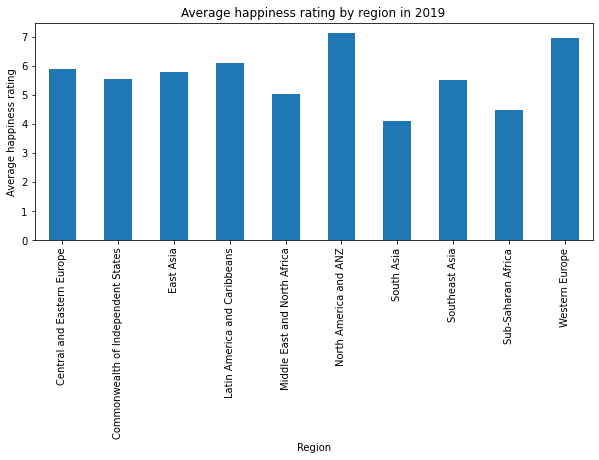

In [20]:
# Plot happiness rating by region from 2019
region_hap_19= rf19_df.groupby('region')['happiness_rating'].mean()
region_hap_19.plot.bar(figsize=(10,4))
plt.xlabel('Region')
plt.ylabel('Average happiness rating')
plt.title('Average happiness rating by region in 2019')

### Observations

In the year 2019, there were distinct regional differences in happiness ratings. The two regions with highest average happiness ratings in 2019 were North America and ANZ and Western Europe. The two regions with the lowest average happiness ratings were South Asia and Sub-Saharan Africa, followed by Middle East and North Africa.

From the initial bar graph analysis, the three countries with the highest happiness ratings (Finland, Switzerland, and Denmark) are all in the Western Europe region, which is in the top two regions with highest average happiness ratings in 2019. The three countries with the lowest happiness ratings (Afghanistan, Zimbabwe, and India) are all in the two regions with the lowest average happiness ratings in 2019, namely South Asia and Sub-Saharan Africa. 

## Question 2: How have happiness ratings changed since 2006 regionally?
### Happiness Over Time

From exploring Question 1, I see that there are some regional differences. I'm now interested in looking at the data longitudinally. That is, how have happiness ratings changed since 2006 and are there any regional patterns that hold true?

Text(0.5, 1.0, 'Average happiness rating by region from 2006-2019')

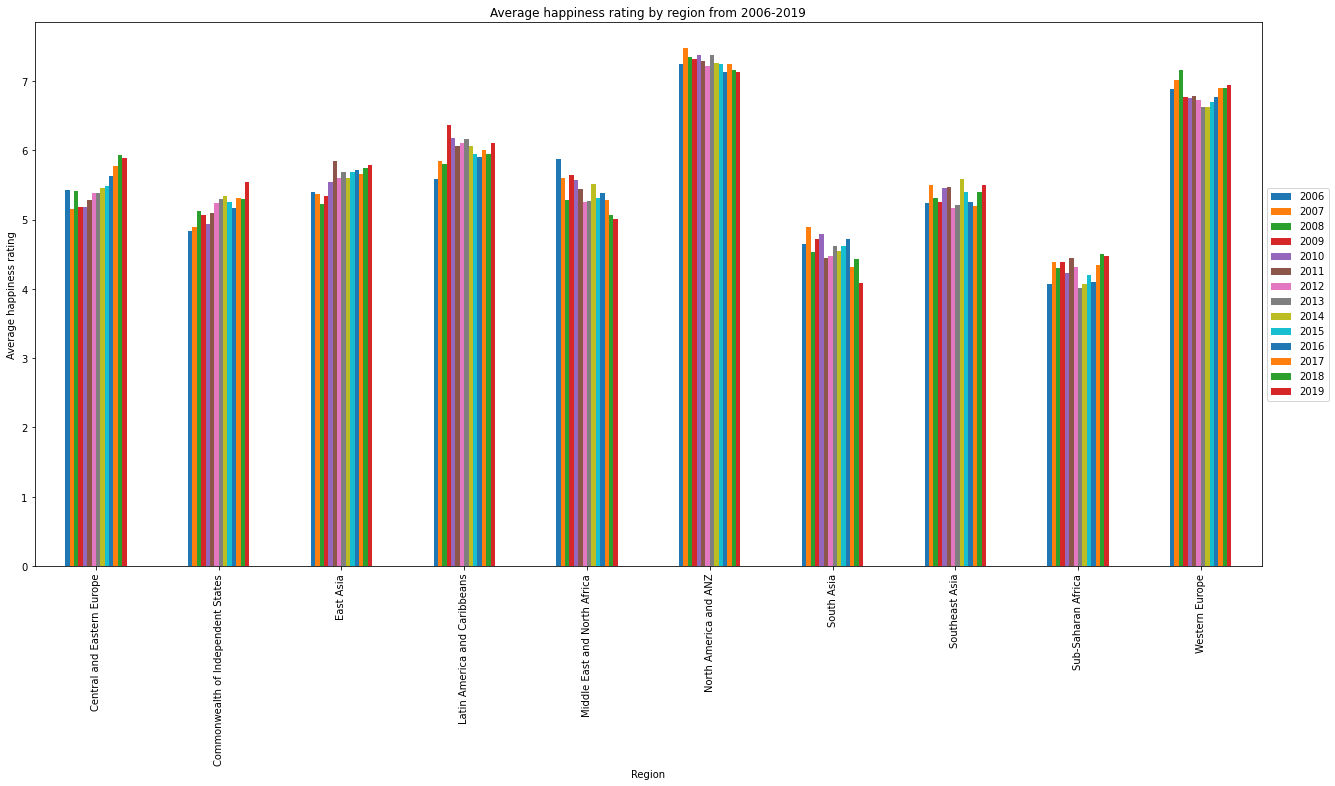

In [21]:
# Plot happiness ratings by region and by year
hap_comp_df.groupby(['region','year'])['happiness_rating'].mean().unstack().plot(kind='bar',figsize=(22,10))
plt.legend(loc= 'center left', bbox_to_anchor=(1.0,0.5))
plt.xlabel('Region')
plt.ylabel('Average happiness rating')
plt.title('Average happiness rating by region from 2006-2019')

Text(0.5, 1.0, 'Average happiness rating 2006-2019 by region')

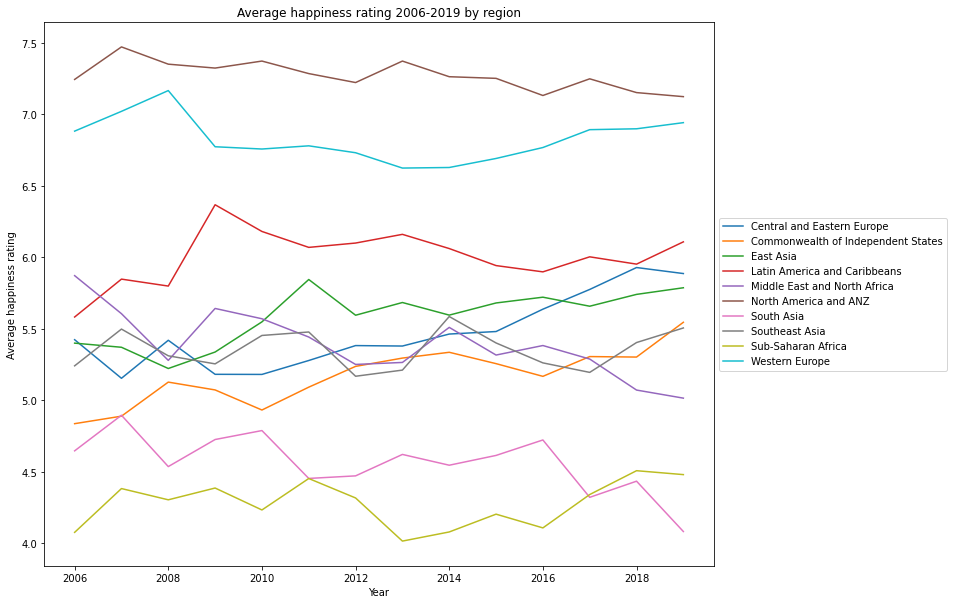

In [22]:
# Plot happiness rating by region longitudinally 2006-2019
hap_comp_df.groupby(['year','region'])['happiness_rating'].mean().unstack().plot(kind='line',figsize=(12,10), stacked=False)
plt.legend(loc= 'center left', bbox_to_anchor=(1.0,0.5))
plt.xlabel('Year')
plt.ylabel('Average happiness rating')
plt.title('Average happiness rating 2006-2019 by region')

### Observations

As seen above, while there is no consistent pattern (all increasing or all decreasing) in the past 14 years. Rather there have been variable fluctuations in happiness ratings. However, as seen with the 2019 data frame, there are still clear regional differences prsent. Countries in the regions North America and ANZ and Western Europe have the highest happiness ratings during the timeframe of 2006-2019. There has been a slight decrease in happiness rating in North America & ANZ in the past three years, alongside a slight increase in happiness rating in Western Europe in the past three years. Countries in the regions of South Asia and Sub-Saharan Africa consistently have the lowest happiness ratings. In fact, South Asia had the lowest regional average of happiness rating in 2019, followed closely by that of Sub-Saharan Africa.

In [23]:
hap_comp_df.groupby(['year','region'])['happiness_rating'].mean()

year  region                            
2006  Central and Eastern Europe            5.422188
      Commonwealth of Independent States    4.834771
      East Asia                             5.398228
      Latin America and Caribbeans          5.581020
      Middle East and North Africa          5.870536
                                              ...   
2019  North America and ANZ                 7.122987
      South Asia                            4.080020
      Southeast Asia                        5.504395
      Sub-Saharan Africa                    4.478289
      Western Europe                        6.941006
Name: happiness_rating, Length: 140, dtype: float64

In [24]:
regional_comp_df = hap_comp_df[['region','year','happiness_rating']]

In [25]:
regional_comp_df

region  year  happiness_rating
0             South Asia  2008          3.723590
1             South Asia  2009          4.401778
2             South Asia  2010          4.758381
3             South Asia  2011          3.831719
4             South Asia  2012          3.782938
...                  ...   ...               ...
1816  Sub-Saharan Africa  2015          3.703191
1817  Sub-Saharan Africa  2016          3.735400
1818  Sub-Saharan Africa  2017          3.638300
1819  Sub-Saharan Africa  2018          3.616480
1820  Sub-Saharan Africa  2019          2.693523

[1821 rows x 3 columns]

In [26]:
regional_comp_df.to_csv('../data/exported_subset_data/for_visualizations/regional_comp_long.csv')

Text(0.5, 1.12, 'Happiness rating by region from 2006 to 2019')

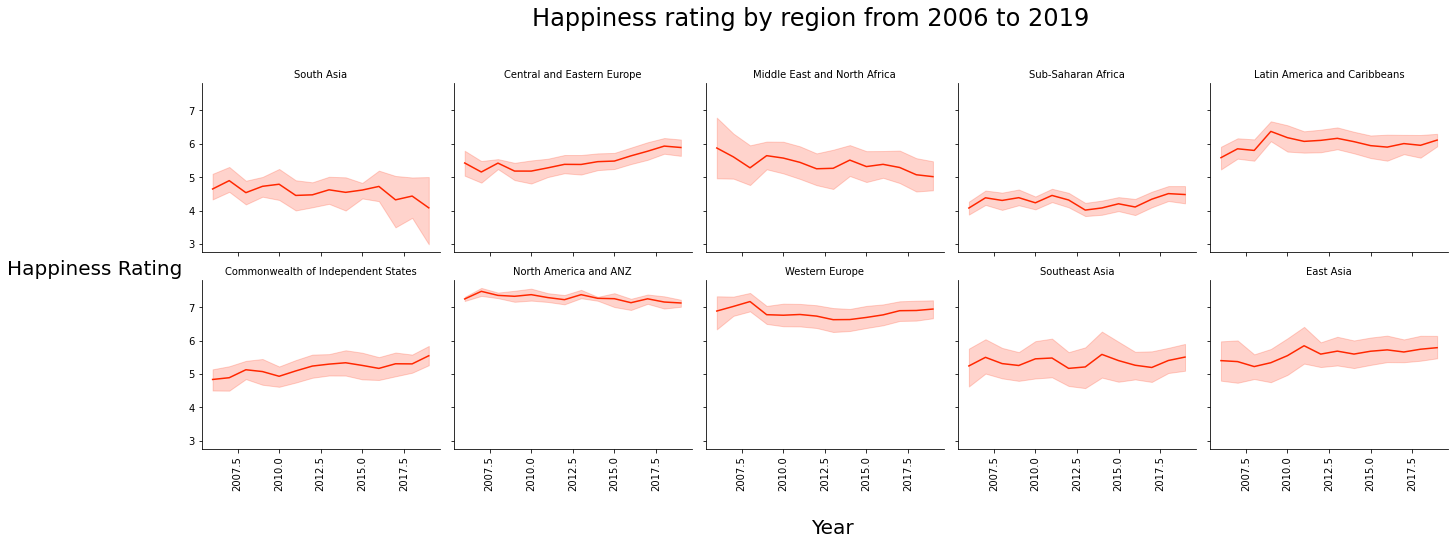

In [27]:
## small multiples plot of the different regions showing longitudinal happiness ratings from 2006 to 2019
## potential visualization
grid_layout = sns.FacetGrid(regional_comp_df
                            ,col = 'region'
                            ,col_wrap = 5
                            ,aspect = 1.2
                            )
grid_layout.map(sns.lineplot, 'year','happiness_rating' ,color ='#FF2700')
grid_layout.set_titles('{col_name}')
for ax in grid_layout.axes:
    ax.set_xlabel("")
    ax.set_ylabel("")
for ax in grid_layout.axes:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
grid_layout.fig.text(0.5, -.1,'Year', fontsize=20) 
grid_layout.fig.text(-0.12, .5,'Happiness Rating', fontsize=20) 
grid_layout.fig.suptitle('Happiness rating by region from 2006 to 2019'
                         ,y = 1.12
                         ,fontsize = 24
                         )

In [28]:
reg_comp_df = regional_comp_df.groupby(['region','year'])['happiness_rating'].mean().unstack()

In [29]:
## percent changes between 2006 and 2019
reg_comp_df['percent_change']=(reg_comp_df[2019]- reg_comp_df[2006])/reg_comp_df[2006]*100

In [30]:
reg_comp_df

year                                    2006      2007      2008      2009  \
region                                                                       
Central and Eastern Europe          5.422188  5.152283  5.418225  5.180073   
Commonwealth of Independent States  4.834771  4.887174  5.125531  5.070795   
East Asia                           5.398228  5.369349  5.220759  5.336026   
Latin America and Caribbeans        5.581020  5.846191  5.797573  6.366542   
Middle East and North Africa        5.870536  5.604301  5.277528  5.640953   
North America and ANZ               7.243404  7.471001  7.350230  7.322928   
South Asia                          4.644593  4.893733  4.534499  4.723865   
Southeast Asia                      5.239426  5.496605  5.309534  5.253169   
Sub-Saharan Africa                  4.074250  4.380688  4.301989  4.384448   
Western Europe                      6.881718  7.020117  7.165480  6.772409   

year                                    2010      2011      2012      2013  \
region                                                                       
Central and Eastern Europe          5.179333  5.276704  5.381173  5.377946   
Commonwealth of Independent States  4.930266  5.090279  5.235646  5.293665   
East Asia                           5.547067  5.843450  5.593542  5.682507   
Latin America and Caribbeans        6.179668  6.068258  6.098579  6.159445   
Middle East and North Africa        5.568804  5.440936  5.249193  5.263122   
North America and ANZ               7.371941  7.284362  7.221647  7.371850   
South Asia                          4.786475  4.451573  4.469489  4.619499   
Southeast Asia                      5.452007  5.476238  5.166570  5.209554   
Sub-Saharan Africa                  4.230924  4.450997  4.314909  4.013127   
Western Europe                      6.756548  6.778830  6.730486  6.623257   

year                                    2014      2015      2016      2017  \
region                                                                       
Central and Eastern Europe          5.461827  5.479457  5.635854  5.773923   
Commonwealth of Independent States  5.334244  5.254742  5.165872  5.304230   
East Asia                           5.594325  5.679316  5.719740  5.656567   
Latin America and Caribbeans        6.060082  5.940901  5.896981  6.002161   
Middle East and North Africa        5.508474  5.314897  5.381496  5.286948   
North America and ANZ               7.262454  7.250975  7.131053  7.247712   
South Asia                          4.544003  4.612539  4.720707  4.319351   
Southeast Asia                      5.584394  5.399503  5.260132  5.193576   
Sub-Saharan Africa                  4.077063  4.201590  4.105461  4.338876   
Western Europe                      6.627262  6.690417  6.766926  6.891960   

year                                    2018      2019  percent_change  
region                                                                  
Central and Eastern Europe          5.927259  5.885161        8.538486  
Commonwealth of Independent States  5.300796  5.544174       14.672958  
East Asia                           5.739374  5.785715        7.178044  
Latin America and Caribbeans        5.951091  6.106953        9.423609  
Middle East and North Africa        5.069914  5.013393      -14.600759  
North America and ANZ               7.151365  7.122987       -1.662438  
South Asia                          4.432261  4.080020      -12.155486  
Southeast Asia                      5.402426  5.504395        5.057214  
Sub-Saharan Africa                  4.505659  4.478289        9.916886  
Western Europe                      6.898085  6.941006        0.861522

## Question 3: Any correlation between country's GDP and happiness ratings?

Given the clear regional differences in happiness ratings, I'm interested in exploring what potential factors or measures can be used as possible indicators for happiness ratings. I will look for potential correlations between different variables and happiness ratings. The first one, the country's GDP per capita.

In [31]:
# Make a subset of the data with columns relevant for GDP analysis
GDP_cols= ['year','happiness_rating','GDP_per_capita','country','region']
GDP_hap_df = hap_comp_df[GDP_cols]

Text(0.5, 1.0, 'COUNTRY: Happiness rating vs. GDP per capita')

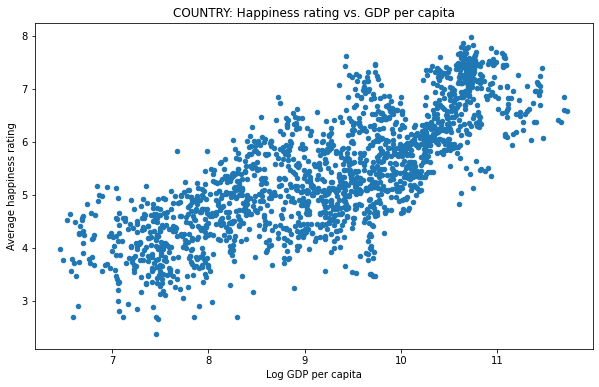

In [32]:
# Plot happiness rating vs. log GDP per capita
GDP_hap_df.plot.scatter(x='GDP_per_capita', y='happiness_rating', figsize=(10,6))
plt.xlabel('Log GDP per capita')
plt.ylabel('Average happiness rating')
plt.title('COUNTRY: Happiness rating vs. GDP per capita')


Text(0.5, 1.0, 'REGION: Happiness rating vs. GDP per capita')

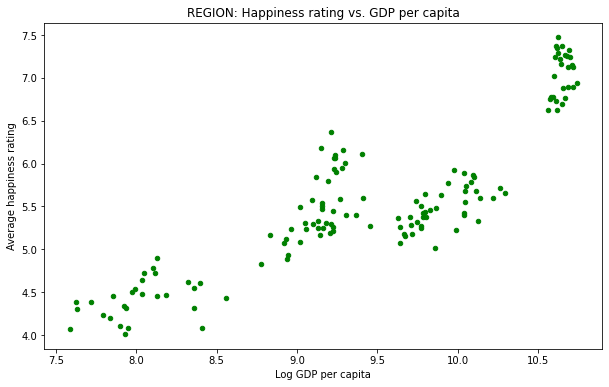

In [33]:
# Calculate mean log GDP per capita and mean happiness rating by region
GDP_reg_df=GDP_hap_df.groupby(['year','region'])['happiness_rating','GDP_per_capita'].mean()
GDP_reg_df.plot.scatter(x='GDP_per_capita', y='happiness_rating', figsize=(10,6), color='green')
plt.xlabel('Log GDP per capita')
plt.ylabel('Average happiness rating')
plt.title('REGION: Happiness rating vs. GDP per capita')

### Observations

There is a clear positive correlation between the log GDP per capita and average happiness rating of the country. Thus, richer countries tend to have higher average happiness ratings for their population. Additionally, the relationship is not directly linear to income, rather it's a log-linear relationship. Happiness ratings appear linearly positively correlated to the log of GDP per capita. Looking at this relationship for each individual country and also categorically by region yield the same positive linear correlation.


In [34]:
income_cols= ['year','happiness_rating','GDP_per_capita','country','region','income_inequality']
income_df = hap_comp_df[income_cols]

In [35]:
income_df.corr()

year  happiness_rating  GDP_per_capita  \
year               1.000000          0.033511        0.071196   
happiness_rating   0.033511          1.000000        0.775703   
GDP_per_capita     0.071196          0.775703        1.000000   
income_inequality  0.087832         -0.305454       -0.384798   

                   income_inequality  
year                        0.087832  
happiness_rating           -0.305454  
GDP_per_capita             -0.384798  
income_inequality           1.000000

Text(0.5, 1.0, 'COUNTRY: income inequality distribution vs GDP')

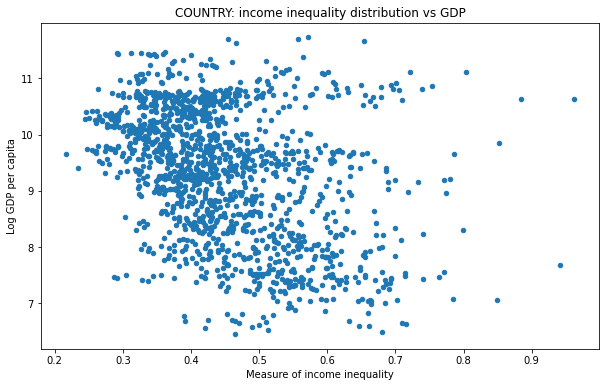

In [36]:
income_df.plot.scatter(x='income_inequality', y='GDP_per_capita', figsize=(10,6))
plt.xlabel('Measure of income inequality')
plt.ylabel('Log GDP per capita')
plt.title('COUNTRY: income inequality distribution vs GDP')

Text(0.5, 1.0, 'COUNTRY: income inequality distribution vs happiness')

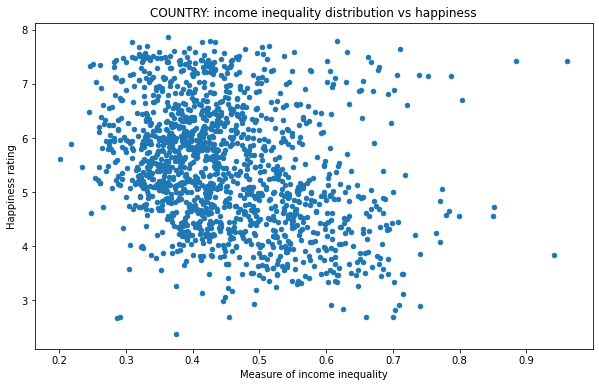

In [37]:
income_df.plot.scatter(x='income_inequality', y='happiness_rating', figsize=(10,6))
plt.xlabel('Measure of income inequality')
plt.ylabel('Happiness rating')
plt.title('COUNTRY: income inequality distribution vs happiness')

Not too strong of a correlation here; seems to have a large spread. So while log GDP per capita has a linear relationship, income inequality might have a weaker negative linear relationship.

## Question 4: Any correlation between social support and happiness ratings?

The second variable I will look at is social support. That is, do countries with higher happiness ratings also have higher social support self-reported averages?

In [38]:
# Make a subset of the data with columns relevant for social support
ss_cols= ['year','happiness_rating','social_support_rating','country','region']
ss_hap_df = hap_comp_df[ss_cols]

Text(0.5, 1.0, 'COUNTRY: Happiness rating vs. social support rating')

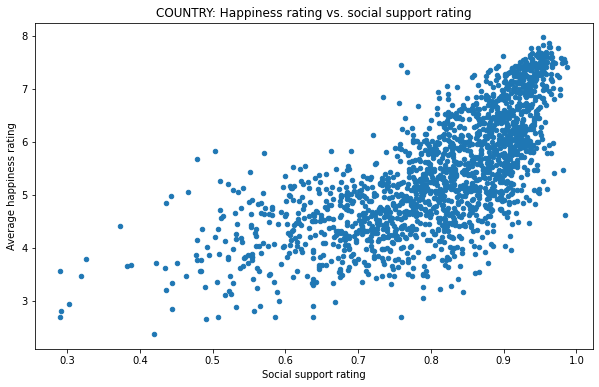

In [39]:
# Plot happiness rating vs. social support rating
ss_hap_df.plot.scatter(x='social_support_rating', y='happiness_rating', figsize=(10,6))
plt.xlabel('Social support rating')
plt.ylabel('Average happiness rating')
plt.title('COUNTRY: Happiness rating vs. social support rating')

Text(0.5, 1.0, 'REGION: Happiness rating vs. GDP per capita')

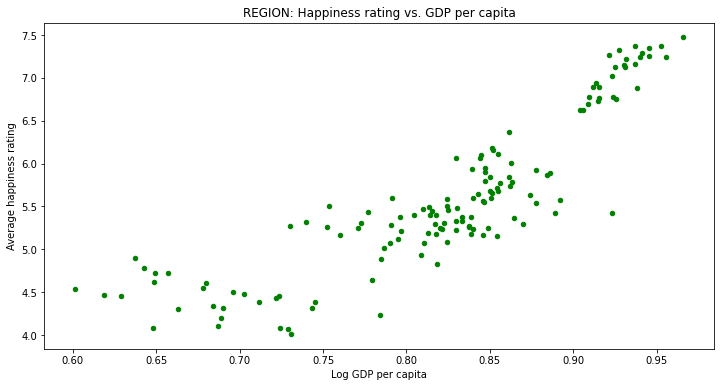

In [40]:
# Calculate mean log GDP per capita and mean happiness rating by region
ss_reg_df=ss_hap_df.groupby(['year','region'])['happiness_rating','social_support_rating'].mean()
ss_reg_df.plot.scatter(x='social_support_rating', y='happiness_rating', figsize=(12,6), color='green')
plt.xlabel('Log GDP per capita')
plt.ylabel('Average happiness rating')
plt.title('REGION: Happiness rating vs. GDP per capita')

### Observations

There is a clear positive correlation between the social support rating and average happiness rating. That is, for countries with a more positive average social support rating, in which individuals feel that they had a relative or friend to rely on, they also tend to have higher happiness ratings. When plotting, the relationship does not appear precisely linear, almost curvilinear, possibly slightly exponential.


In [41]:
ss_hap_df.corr()

year  happiness_rating  social_support_rating
year                   1.000000          0.033511              -0.011527
happiness_rating       0.033511          1.000000               0.701409
social_support_rating -0.011527          0.701409               1.000000

In [42]:
ss_reg_df.corr()

happiness_rating  social_support_rating
happiness_rating               1.000000               0.868109
social_support_rating          0.868109               1.000000

## Question 5: Any correlation between health (life expectancy) and happiness?


Health is a huge component of wellness, both physical and mental. The third variable I will look at is life expectancy at birth as a measure for health.

In [43]:
# Make a subset of the data with columns relevant for life expectancy
health_cols= ['year','happiness_rating','life_expectancy','country','region']
health_hap_df = hap_comp_df[health_cols]

Text(0.5, 1.0, 'COUNTRY: Happiness rating vs. life expectancy (health)')

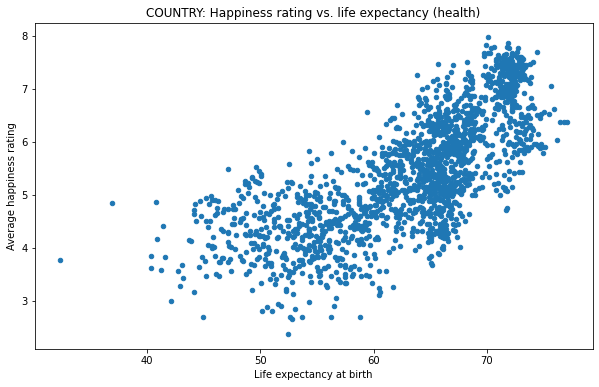

In [44]:
# Plot life expectancy and happiness rating by individual country
health_hap_df.plot.scatter(x='life_expectancy', y='happiness_rating', figsize=(10,6))
plt.xlabel('Life expectancy at birth')
plt.ylabel('Average happiness rating')
plt.title('COUNTRY: Happiness rating vs. life expectancy (health)')

Text(0.5, 1.0, 'REGION: Happiness rating vs. life expectancy')

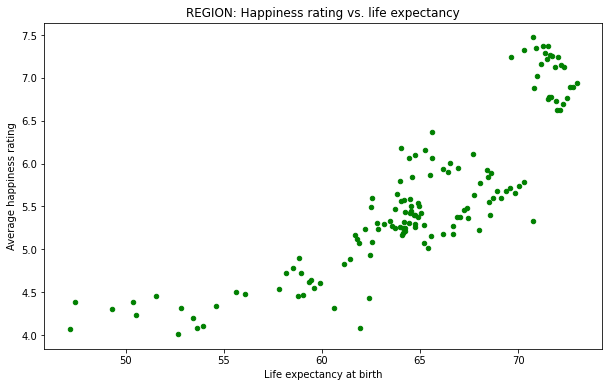

In [45]:
# Plot by region
health_reg_df=health_hap_df.groupby(['year','region'])['happiness_rating','life_expectancy'].mean()
health_reg_df.plot.scatter(x='life_expectancy', y='happiness_rating', figsize=(10,6), color='green')
plt.xlabel('Life expectancy at birth')
plt.ylabel('Average happiness rating')
plt.title('REGION: Happiness rating vs. life expectancy')

### Observations

There is a clear positive correlation between life expectancy at birth and average happiness rating. Countries for whom the average life expectancy at birth is higher, also tend to have higher happiness ratings. Perhaps there might be a correlation between health and happiness-- in other words, a healthier country is a happier country? It would be interesting to look at illness/mortality rates or even disability rates to see if any of these create a similar strong correlation, negative though, with happiness ratings.

## Question 6: Any correlations between faith in gvt vs happiness?
Faith in government measured by three different variables (corruption_perceptions,democratic_quality, and confidence_gvt)

The political climate of a country may also have some predictive power. I will look at perceptions of corruption, measures of democratic quality, and confidence in the national government as three different variables for political attitudes.

In [46]:
# Make a subset of the data with columns relevant 
gvt_cols= ['year','happiness_rating','corruption_perceptions','democratic_quality','confidence_gvt','country','region']
gvt_hap_df = hap_comp_df[gvt_cols]

In [47]:
# Subset with means based on region
gvt_reg_df=gvt_hap_df.groupby(['region','year'])['happiness_rating','corruption_perceptions','democratic_quality','confidence_gvt'].mean()


Text(0.5, 1.0, 'COUNTRY: Happiness rating vs. perceptions of corruption')

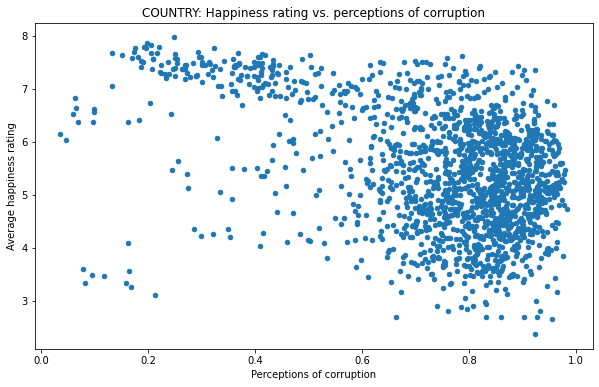

In [48]:
# Plot each country for corruption perception measure
gvt_hap_df.plot.scatter(x='corruption_perceptions', y='happiness_rating', figsize=(10,6))
plt.xlabel('Perceptions of corruption')
plt.ylabel('Average happiness rating')
plt.title('COUNTRY: Happiness rating vs. perceptions of corruption')

Text(0.5, 1.0, 'REGION: Happiness rating vs. perceptions of corruption')

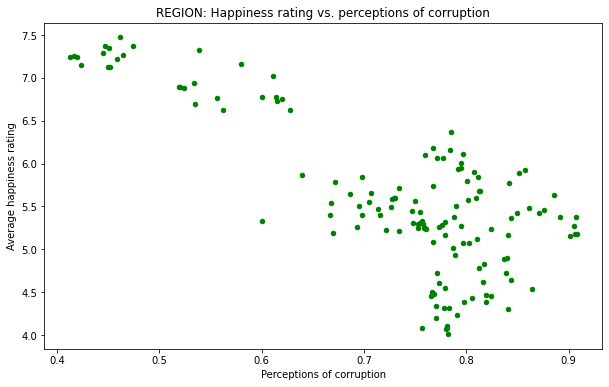

In [49]:
# Plot regional data for corruption perception measure
gvt_reg_df.plot.scatter(x='corruption_perceptions', y='happiness_rating', figsize=(10,6), color='green')
plt.xlabel('Perceptions of corruption')
plt.ylabel('Average happiness rating')
plt.title('REGION: Happiness rating vs. perceptions of corruption')

Text(0.5, 1.0, 'COUNTRY: Happiness rating vs. confidence in national gvt')

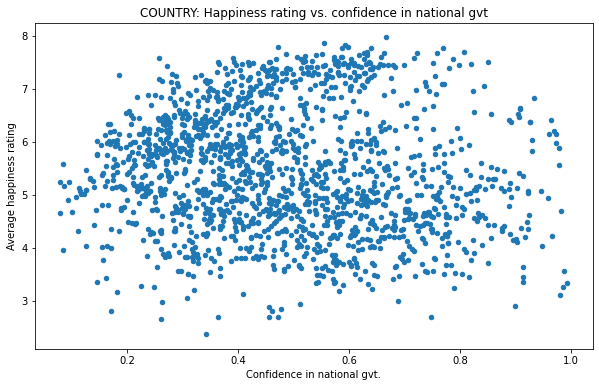

In [50]:
# Plot each country for confidence in national gvt. measure
gvt_hap_df.plot.scatter(x='confidence_gvt', y='happiness_rating', figsize=(10,6))
plt.xlabel('Confidence in national gvt.')
plt.ylabel('Average happiness rating')
plt.title('COUNTRY: Happiness rating vs. confidence in national gvt')

Text(0.5, 1.0, 'REGION: Happiness rating vs. confidence in national gvt')

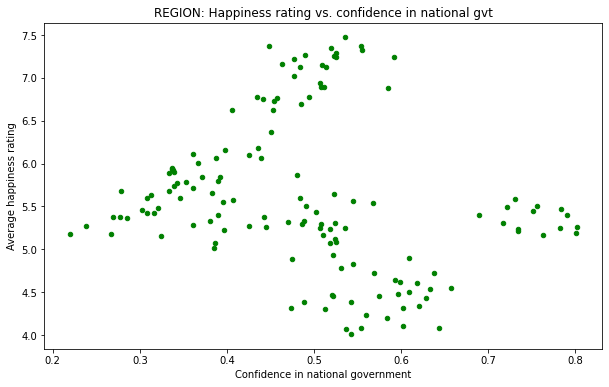

In [51]:
# Plot regional means for confidence in national gvt measure
gvt_reg_df.plot.scatter(x='confidence_gvt', y='happiness_rating', figsize=(10,6), color='green')
plt.xlabel('Confidence in national government')
plt.ylabel('Average happiness rating')
plt.title('REGION: Happiness rating vs. confidence in national gvt')

Text(0.5, 1.0, 'COUNTRY: Happiness rating vs. democratic quality')

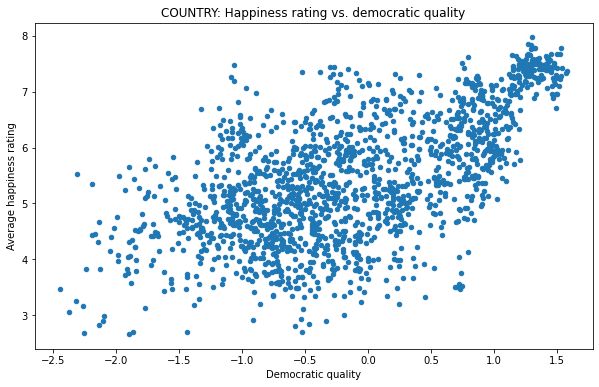

In [52]:
# Plot each country for democratic quality measure
gvt_hap_df.plot.scatter(x='democratic_quality',y='happiness_rating', figsize= (10,6))
plt.xlabel('Democratic quality')
plt.ylabel('Average happiness rating')
plt.title('COUNTRY: Happiness rating vs. democratic quality')

Text(0.5, 1.0, 'REGION: Happiness rating vs. democratic quality')

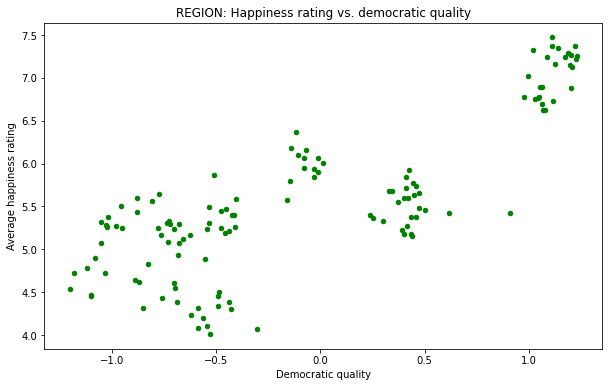

In [53]:
# Plot regional means for democratic quality measure
gvt_reg_df.plot.scatter(x='democratic_quality', y='happiness_rating', figsize=(10,6), color='green')
plt.xlabel('Democratic quality')
plt.ylabel('Average happiness rating')
plt.title('REGION: Happiness rating vs. democratic quality')

### Observations

Lower perceptions of corruption correlates with higher happiness ratings. No clear correlation for confidence in national government measure. Positive correlation between democratic quality and happiness ratings. Very interesting...will have to delve deeper for this.

## Question 7: Any correlation between affect vs. happiness?

The last variable I will look at for this data analysis is affect. Are other feelings potential proxy measures for happiness ratings? I will look at positive affect (which should have a positive correlation with happiness rating) and negative affect (which should have a negative correlation with happiness rating).

In [54]:
# Make a subset of the data with columns relevant for positive and negative affect
affect_cols= ['year','happiness_rating','positive_affect','negative_affect','country','region']
affect_hap_df = hap_comp_df[affect_cols]

Text(0.5, 1.0, 'Happiness rating vs. positive affect')

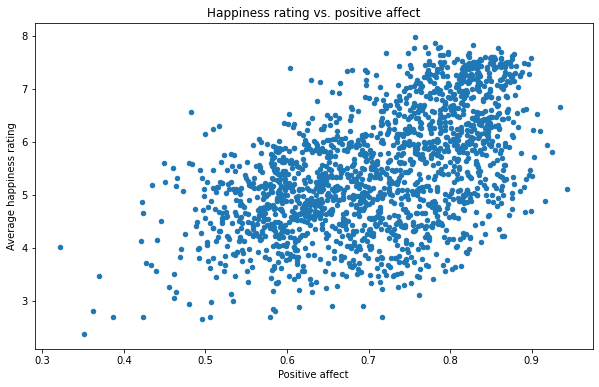

In [55]:
# Plot for positive affect variable 
affect_hap_df.plot.scatter(x='positive_affect', y='happiness_rating', figsize=(10,6))
plt.xlabel('Positive affect')
plt.ylabel('Average happiness rating')
plt.title('Happiness rating vs. positive affect')

As expected, more positive affect (positive feelings) correlates with higher happiness ratings.

Text(0.5, 1.0, 'Happiness rating vs. negative affect')

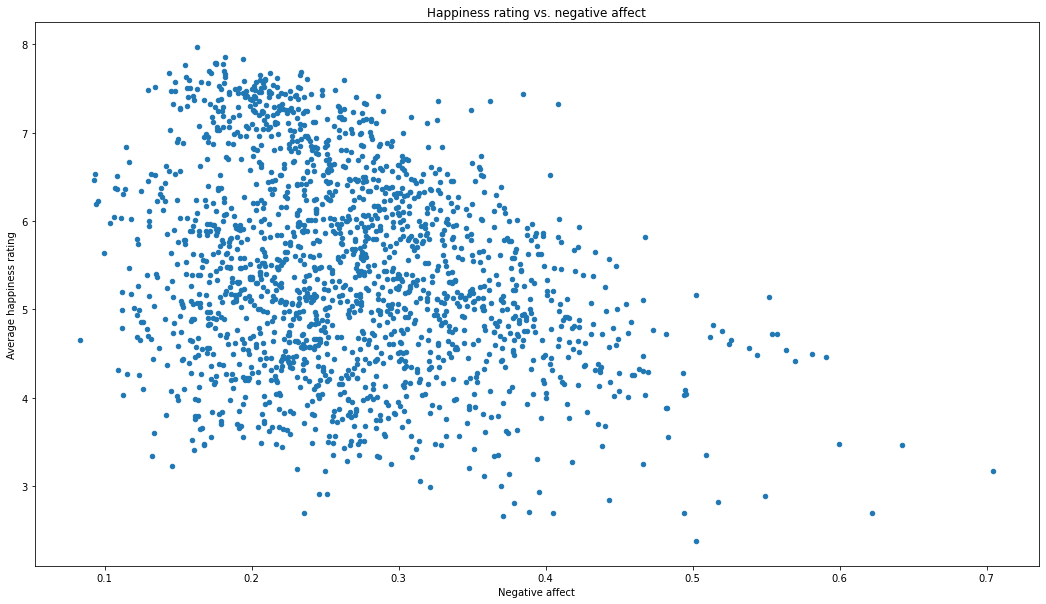

In [56]:
# Plot for negative affect measure
affect_hap_df.plot.scatter(x='negative_affect', y='happiness_rating', figsize=(18,10))
plt.xlabel('Negative affect')
plt.ylabel('Average happiness rating')
plt.title('Happiness rating vs. negative affect')

As expected, more negative affect (negative feelings) correlates with lower happiness ratings.

### Thinking about visualizing the correlation between the variables explored above and happiness ratings

<AxesSubplot:xlabel='negative_affect', ylabel='happiness_rating'>

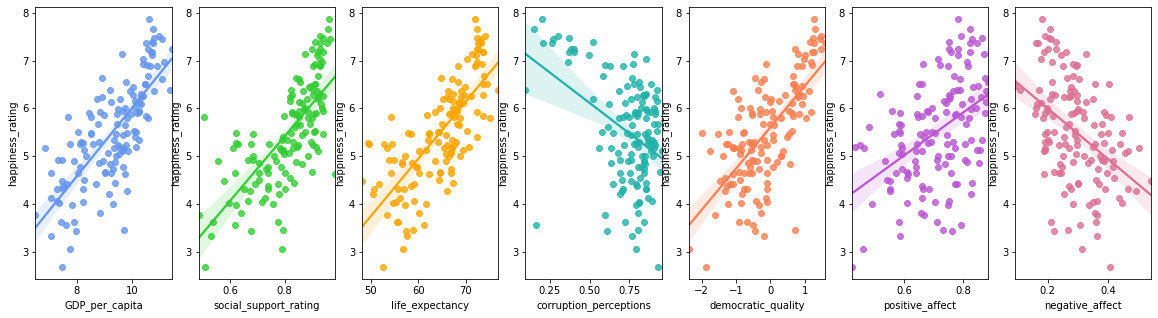

In [57]:
## 2018
row_filter_2018=hap_comp_df['year']==2018
rf18_df=hap_comp_df[row_filter_2018]
plt.rcParams['figure.figsize'] = [20,5]
fig, axs = plt.subplots(ncols=7)
sns.regplot(x='GDP_per_capita', y='happiness_rating', data=rf18_df, ax=axs[0], color='cornflowerblue')
sns.regplot(x='social_support_rating', y='happiness_rating', data=rf18_df, ax=axs[1], color='limegreen')
sns.regplot(x='life_expectancy',y='happiness_rating', data=rf18_df, ax=axs[2], color='orange')
sns.regplot(x='corruption_perceptions',y='happiness_rating', data=rf18_df, ax=axs[3], color='lightseagreen')
sns.regplot(x='democratic_quality',y='happiness_rating', data=rf18_df, ax=axs[4], color='coral')
sns.regplot(x='positive_affect',y='happiness_rating', data=rf18_df, ax=axs[5], color='mediumorchid')
sns.regplot(x='negative_affect',y='happiness_rating', data=rf18_df, ax=axs[6], color='palevioletred')

### Observations

Some clear linear correlations for GDP per capita, social support, life expectancy, and democratic quality. Less so for corruption, and weaker association for positive and negative affect.

Maybe consider looking at just GDP per capita, social support rating, life expectancy, and some measure related to government to cover the four sectors of economy, health, sociocultural, and politics.

## Multiple Regression Analysis

Since there are multiple variables, all with some degree of correlation with happiness, I will do a multiple regression analysis that will take into account all the variables.

In [58]:
## create subset with just potential variables of interest, grouped by country across all years
agg_df=hap_comp_df.groupby('country')[['happiness_rating','GDP_per_capita','social_support_rating','life_expectancy','delivery_quality']].mean()

<AxesSubplot:xlabel='delivery_quality', ylabel='happiness_rating'>

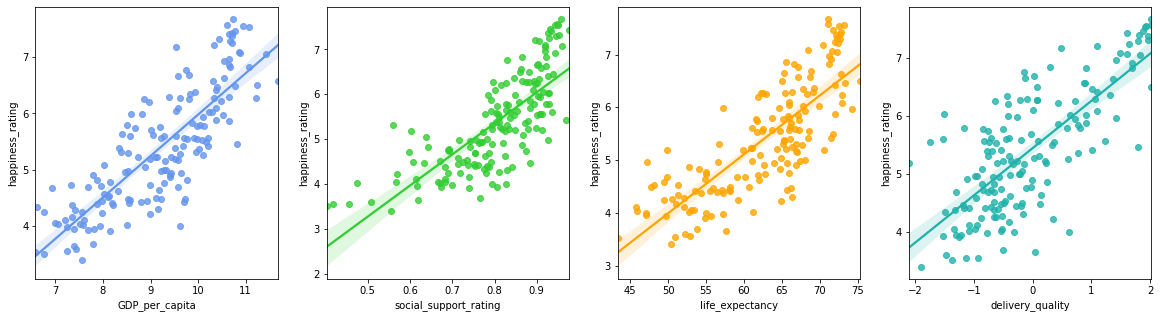

In [59]:
## small multiples plot when aggregated by country for all years
plt.rcParams['figure.figsize'] = [20,5]
fig, axs = plt.subplots(ncols=4)
sns.regplot(x='GDP_per_capita', y='happiness_rating', data=agg_df, ax=axs[0], color='cornflowerblue')
sns.regplot(x='social_support_rating', y='happiness_rating', data=agg_df, ax=axs[1], color='limegreen')
sns.regplot(x='life_expectancy',y='happiness_rating', data=agg_df, ax=axs[2], color='orange')
sns.regplot(x='delivery_quality',y='happiness_rating', data=agg_df, ax=axs[3], color='lightseagreen')


In [60]:
## dropping missing rows
agg_df.replace([np.inf, -np.inf], np.nan)
agg_df.dropna(inplace=True)

In [61]:
## multiple regression analysis
X= agg_df[['GDP_per_capita','social_support_rating','life_expectancy','delivery_quality']]
Y= agg_df['happiness_rating']
X=sm.add_constant(X)
est=sm.OLS(Y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       happiness_rating   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     146.0
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           1.66e-51
Time:                        15:30:20   Log-Likelihood:                -112.37
No. Observations:                 160   AIC:                             234.7
Df Residuals:                     155   BIC:                             250.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.5817      0.529     -1.100      0.273      -1.626       0.463
GDP_per_capita            0.1841      0.072      2.562      0.011       0.042       0.326
social_support_rating     2.7720      0.508      5.453      0.000       1.768       3.776
life_expectancy           0.0329      0.010      3.325      0.001       0.013       0.053
delivery_quality          0.2879      0.065      4.398      0.000       0.159       0.417
==============================================================================
Omnibus:                        0.865   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.676
Skew:                          -0.157   Prob(JB):                        0.713
Kurtosis:                       3.049   Cond. No.                         891.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observations

R-squared value of 0.796-- ~80% of variation in happiness ratings (dependent variable) can be explained by the four variables selected -- GDP per capita, life expectancy, social support rating, and government delivery quality. Actually pretty substantial